# <font color='blue'>QNET Example Code</font> 

## 1. Quantum Memory Simulation 

In [1]:
import QNET

### 1.1 Creating nodes with quantum memory

Construct a linear network with alternating ground and swapper nodes. Qnodes A and B are connected in the end.         A satellite S is connected to both Qnodes and all swapper nodes in the network.  

Default satellite connected to the network is ISS Zarya. 
Default tracking start time of the satellite is the current time (in UTC). 

In [2]:
G = QNET.altLinSatGen(3, spacing = [10, 10, 0])


(2020, 7, 28, 10, 30, 19.31210607290268)


We can now understand the structure of the graph Q as follows:

-- Default cost vector --
{'e': 1, 'f': 1}
-- Qnodes --
Name: "A"
<class 'Node.Qnode'>
Coordinates: [10, 10, 0]
Costs: {'e': 1, 'f': 1, 'add_e': 0.0, 'add_f': 0.0}

Name: "G1"
<class 'Node.Ground'>
Coordinates: [20 20  0]
Costs: {'e': 1, 'f': 1, 'add_e': 0.0, 'add_f': 0.0}

Name: "B"
<class 'Node.Qnode'>
Coordinates: [30 30  0]
Costs: {'e': 1, 'f': 1, 'add_e': 0.0, 'add_f': 0.0}

Name: "S"
<class 'Node.Satellite'>
Coordinates: [51, 118, 424]
Costs: {'e': 1, 'f': 1, 'add_e': 0.0, 'add_f': 0.0}
Cartesian == False

-- Qchans --
A <--> G1
Costs: {'e': 1, 'f': 1, 'add_e': 0.0, 'add_f': 0.0}
A <--> S
Costs: {'e': 0.9463450225797603, 'f': 0.994515495666167, 'add_e': 0.05514805910869446, 'add_f': 0.01102961182173881}
G1 <--> B
Costs: {'e': 1, 'f': 1, 'add_e': 0.0, 'add_f': 0.0}
B <--> S
Costs: {'e': 0.9580480571396515, 'f': 0.995732581323763, 'add_e': 0.04285733824058559, 'add_f': 0.008571467648117106}



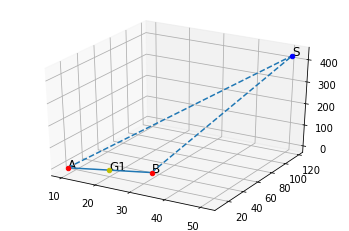

In [3]:
print(G)
QNET.plot_3d(G)

Now let's add the quantum memory feature to both ground node A and satellite node S. 

Let's also change the default value of memory efficiency (mem_e) and memory fidelity (mem_f) for the node A to customise our graph. 

Note that default values of memory cost for nodes with quantum memory is {'mem_e' :1, 'mem_f' :1}. 

In [4]:
G.getNode('A').isMemory = True
G.getNode('S').isMemory = True

G.getNode('A').memory = {'mem_e' :0.5, 'mem_f' :0.7}

### 1.2 Creating temporal extension of a given graph

After having added quantum memory in our network, let's create a temporal extension of our graph.

(The number in front of node names represents the layer number of the nodes.)

The function temporalGen() creates a temporal extension of given graph to simulate the effect of quantum memory. Each layer(slice) of this temporal graph is an updated/evolved version of the previous layer by dt time. n such layers of these time updated graphs are created and only those nodes with quantum memory (node.isMemory == True) are connected in the temporal dimension. 

However, out of all these n time-updated layers of graph Q, we might only want to connect a few in the temporal dimension. The arguments startLayer and endLayer correspond to the number of layer between which all the graphs are connected. 
    
    Example: If startLayer=1 and endLayer=3, only layers from 1 to 3 are connected in temporal dimension. But the finalgraph 
        
        t=0   -------
        
        t=1   ------- startLayer=1
              | | | |
        t=2   ------- 
              | | | |
        t=3   ------- endLayer=3
        :
        t=n-1 -------
        
    Parameters
    ----------
    Q : QNET Graph
        The spatial graph which is to be utilised to make a spatio-temporal graph.
    dt : float
        Time steps by which each layer/slice/graph is to be updated.
    n : int
        Number of such layers/slices/graphs to be made.
    startLayer : int
        The number corresponding to first layer starting which the layers are connected in temporal dimension.
        Default value is 0 i.e. the first layer itself. 
    endLayer : int
        The number corresponding to last layer at which the layers' connection in temporal dimension ends. 
        Default value is n-1 i.e. the last layer itself. 

    Returns
    -------
    finalGraph : QNET Graph
        The temporal extension (including both connected and unconnected layers) of given graph Q.

In [5]:
Q = QNET.temporalGen(G, dt = 300, n = 3, startLayer = 0, endLayer = 2)
print(Q)

-- Default cost vector --
{'e': 1, 'f': 1}
-- Qnodes --
Name: "0A"
<class 'Node.Qnode'>
Coordinates: [10, 10, 0]
Costs: {'e': 1, 'f': 1, 'add_e': 0.0, 'add_f': 0.0}

Name: "0G1"
<class 'Node.Ground'>
Coordinates: [20 20  0]
Costs: {'e': 1, 'f': 1, 'add_e': 0.0, 'add_f': 0.0}

Name: "0B"
<class 'Node.Qnode'>
Coordinates: [30 30  0]
Costs: {'e': 1, 'f': 1, 'add_e': 0.0, 'add_f': 0.0}

Name: "0S"
<class 'Node.Satellite'>
Coordinates: [51, 118, 424]
Costs: {'e': 1, 'f': 1, 'add_e': 0.0, 'add_f': 0.0}
Cartesian == False

Name: "1A"
<class 'Node.Qnode'>
Coordinates: [10, 10, 0]
Costs: {'e': 1, 'f': 1, 'add_e': 0.0, 'add_f': 0.0}

Name: "1G1"
<class 'Node.Ground'>
Coordinates: [20 20  0]
Costs: {'e': 1, 'f': 1, 'add_e': 0.0, 'add_f': 0.0}

Name: "1B"
<class 'Node.Qnode'>
Coordinates: [30 30  0]
Costs: {'e': 1, 'f': 1, 'add_e': 0.0, 'add_f': 0.0}

Name: "1S"
<class 'Node.Satellite'>
Coordinates: [50, 147, 424]
Costs: {'e': 1, 'f': 1, 'add_e': 0.0, 'add_f': 0.0}
Cartesian == False

Name: "2A"
<

As seen in the properties of graph Q, new edges have been added between all the graph layers between startLayer and endLayer. These edges can also be seen in following 3d plot as the edges between updated positions of the satellite node S. 

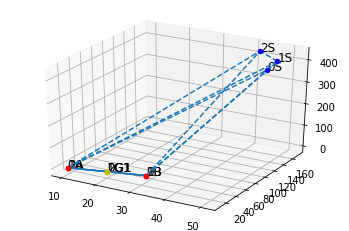

In [6]:
QNET.plot_3d(Q)

## 2. Satellite Simulation 

In [7]:
import QNET
import matplotlib.pyplot as plt
import numpy as np

### 2.1 Adding satellite to the network

Construct a linear network with alternating ground and swapper nodes. Qnodes A and B are connected in the end.         A satellite S is connected to both Qnodes and all swapper nodes in the network.  

Default satellite connected to the network is ISS Zarya. 
Default tracking start time of the satellite is the current time (in UTC). 

In [8]:
Q = QNET.altLinSatGen(5, [10,-10,0])


(2020, 7, 28, 10, 30, 33.39374363422394)


This creates a network with 5 nodes on ground and one satellite as can be visualised in the following way. [10,-10,0] is the distance between the nodes on ground. 

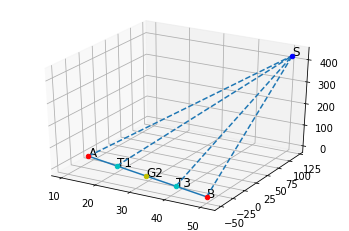

In [9]:
QNET.plot_3d(Q)

To add a satellite of your choice, you can also pass the TLE elements of a satellite to the function. The following code adds the satellite SES 1 to the QNET using its TLE elements (instead of the default ISS Zarya). The start time has been initialised to 50 which implies that the satellite has been initialised in the network at 50 seconds ahead of the current time.  

In [10]:
l1 = '1 36516U 10016A   20150.51240440 -.00000114 +00000-0 +00000-0 0  9994'
l2 = '2 36516 000.0097 331.1561 0002447 090.4012 269.4146 01.00271577036889'
Q = QNET.altLinSatGen(5, [10,-10,0], Line1 = l1, Line2 = l2, startTime = 50)

(2020, 7, 28, 10, 30, 35.59401333332062)


### 2.2 Plotting effciency of all paths 

We can now plot the efficiency of the different paths present in the network. For now, let's work with the default ISS Zarya satellite. 

tMax describes the total time in seconds for which the satellite is being tracked. dt describes the time intervals at which the satellite is tracked. 

Hence, the satellite is tracked at the following times: 
[currentTime+startTime, currentTime+startTime+dt, currentTime+startTime+(2*dt), currentTime+startTime+(3*dt),..., tMax].   

In [11]:
# Compute the loss array for all the different paths in a graph
Q = QNET.altLinSatGen(5, [10,-10,0])
tMax = 5000
dt = 100
lossArrs = QNET.sim_all_simple(Q, 'A', 'B', tMax, dt, cost_type='e')
timeArr = QNET.getTimeArr(tMax, dt)

(2020, 7, 28, 10, 30, 36.83834373950958)


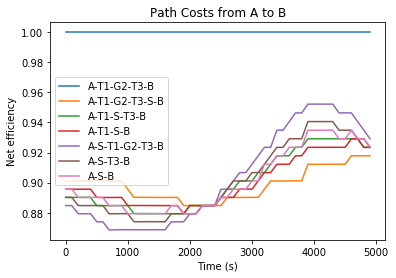

In [12]:
# Plot these loss array
for path in lossArrs:
        plt.plot(timeArr, lossArrs[path], label = path.stringify())

plt.xlabel('Time (s)')
plt.ylabel('Net efficiency')
plt.title('Path Costs from A to B')
plt.legend()

plt.show()

### 2.3 Plotting distance between ground nodes and satellite

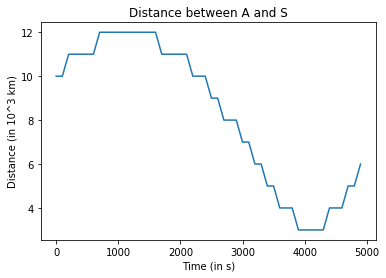

In [13]:
QNET.posPlot(Q, 'A', 'S', tMax, dt)

### 2.4 Plotting map of the graph evolution

Satellite starts at currentTime+startTime (represented by black color) and stops at tMax (represented by red color). The color change from black to red shows progress in time.

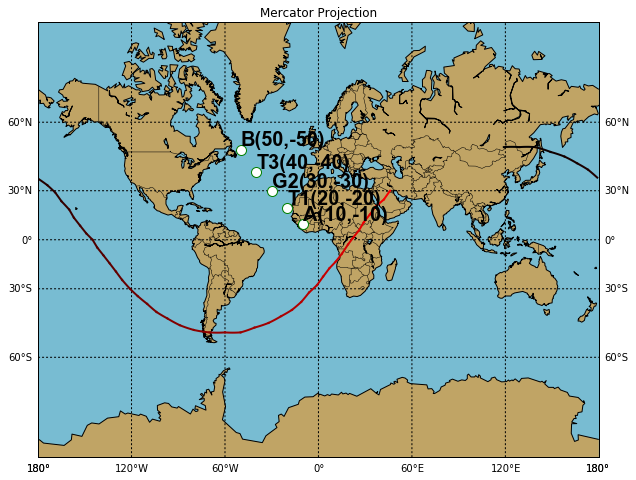

In [14]:
QNET.plotMap(Q, tMax, dt)


Confirm that your satellite ISS Zarya is moving as expected by comparing it with other real-time trackers: https://www.n2yo.com/satellite/?s=25544.  